# Introduction

## Objective
The goal of this project is mainly to detect fraudulent activity in credit card transactions. For that, we will use multi level classification, transaction risk scoring. Besides, we will also include real time fraud/anomaly detection and identify the impact of the fraud.

## Understanding Dataset
The project is built upon the dataset from kaggle. The dataset consists of 30 columns. "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class". 
- Among them, 'V1' - 'v28' are principal components obtained after PCA transformation. 
- Time is elapsed time since transaction. 
- Amount refers to transaction amount.
- Class indicates 1 = fraudulent, 0 = non-fraudulent transaction.

We will explore the data further and in depth in EDA step.

# Data Loading

## Library importing

In [6]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

## Data Loading


Here, we define src in sys which will be used for importing other scripts.

In [7]:
project_path = os.path.abspath('..')
if project_path + '/src' not in sys.path:
    sys.path.append(os.path.join(project_path, 'src'))

First, we need to import necessary functions from the script.

In [8]:
from data_preprocessing import load_data, clean_data, scale_features, over_sampling, under_sampling, detect_anomalies

ImportError: cannot import name 'detect_anomalies' from 'data_preprocessing' (/Users/apple/Desktop/machine/mmm/Credit_Card_Fraud_Detection/src/data_preprocessing.py)

Now, we can call load_data function. It will read csv file and return dataframe.

In [9]:
data = load_data('../dataset/raw/creditcard.csv')

we can also verify if data is loaded successfully.

In [10]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

## Data Exploration

We can check if data is loaded successfully. We can check details about the data.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Cleaning Data and Filing Missing Values

We can check if there's any missing data in each column.

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Next, we can call clean_data function. It will return cleaned dataframe. It will remove duplicates and null values.

In [15]:
cleaned_data = clean_data(data)
del data

For further analysis, we need to have oversampling(SMOTE) and undersampling. We will mainly focus on Class column as it is the target column.

In [16]:
# under_sampled_data = under_sampling(cleaned_data)
# over_sampled_data = over_sampling(cleaned_data)

## Feature Distribution

Here, we will visualize feature distribution to understand the distribution of 'amount' feature using histogram.

<Axes: xlabel='Amount', ylabel='Count'>

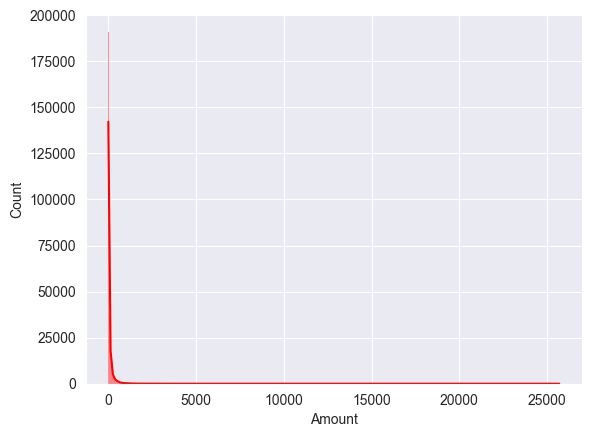

In [17]:
sns.histplot(cleaned_data['Amount'], kde=True, color='red', bins=500)

We can see that most of the transactions are less than 1000. We can use undersampling to balance the data. For that, we will apply undersampling in Feature development and Model Building.

Now, we will visualize feature distribution to understand the distribution of 'time' feature using histogram.

<Axes: xlabel='Time', ylabel='Count'>

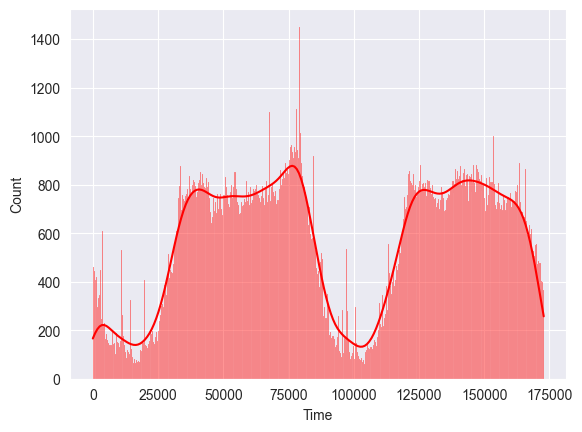

In [18]:
sns.histplot(cleaned_data['Time'], kde=True, color='red', bins=500)

### Time-Series Fraud Detection

The dataset contains a Time column, which represents the seconds elapsed between the transaction and the first transaction in the dataset. As we want to verify 'which time of day' fraud/non-fraud transactions occur, we will use Density Plot to visualize the distribution.

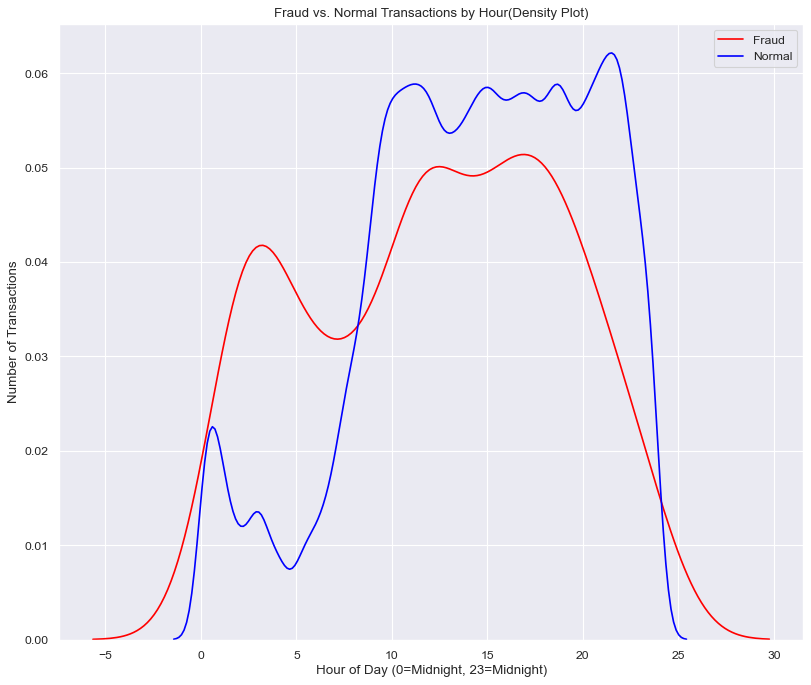

In [25]:
# first we can convert that to hour.
cleaned_data['Hour'] = (cleaned_data['Time'] / 3600).apply(lambda x: x % 24)

plt.figure(figsize=(12,10), dpi= 80, facecolor='w', edgecolor='k')
sns.kdeplot(cleaned_data[cleaned_data['Class'] == 1]['Hour'], label='Fraud', color='red')
sns.kdeplot(cleaned_data[cleaned_data['Class'] == 0]['Hour'], color='blue', label='Normal')

plt.xlabel('Hour of Day (0=Midnight, 23=Midnight)')
plt.ylabel('Number of Transactions')
plt.title('Fraud vs. Normal Transactions by Hour(Density Plot)')
plt.legend(['Fraud', 'Normal'])
plt.show()

# we dont need to keep the hour column as it is consuming too much memory.
del cleaned_data['Hour']

We can see that most of the transactions are in the before 10 hour. Also, we can see that most of the fraud transactions are also start from 10 hour. So, just basic analysis shows us that **most of the fraud transactions takes place when most transactions are taking place**. 

**We need to keep this mind for further analysis. As we need accuracy of training model to be higher, we need to separate fraud cases from large amount of non-fraud cases.**

### Customer Segmentation for Fraud Detection

Next, we will visualize customer segmentation for fraud detection. For that, we can use clustering techniques (like KMeans) to segment customers based on transaction patterns and identify potential fraud risk groups.

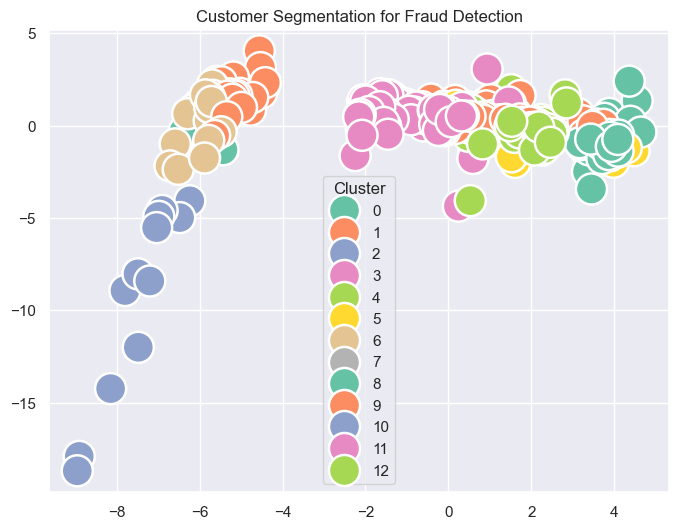

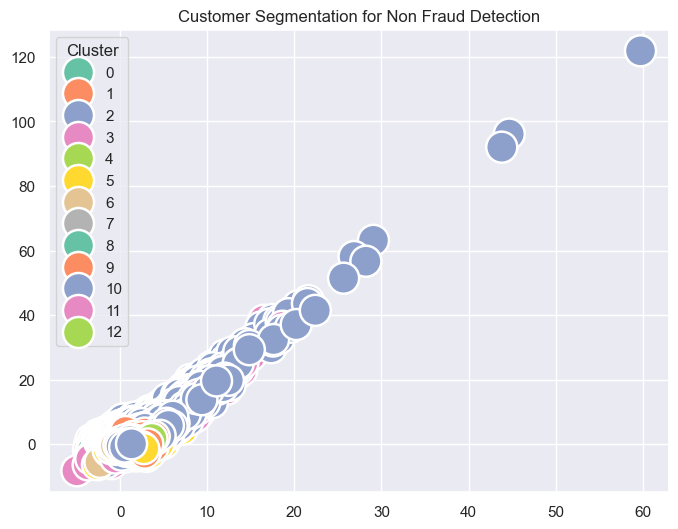

In [53]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

correlation_matrix = cleaned_data.corr()

# first to avoid duplicates we will remove the lower triangle
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
# let's consider 0.3 as the threshold. so will consider clustering only if correlation is [0.3, 1], [-1, -0.3]
positive_correlation_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.1)]
negative_correlation_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] < -0.1)]

selected_features = list(set(positive_correlation_columns + negative_correlation_columns + ['Amount']))

# Separate fraud and non-fraud data
fraud_data = cleaned_data[cleaned_data['Class'] == 1].copy()
non_fraud_data = cleaned_data[cleaned_data['Class'] == 0].copy()


# invoking scaled_features function from script
scaled_features_fraud = scale_features(fraud_data)
scaled_features_non_fraud = scale_features(non_fraud_data)


kmeans = KMeans(n_clusters=len(selected_features), random_state=42)

# scaling only positive and negative correlation columns to avoid data leakage.
fraud_data['Cluster'] = kmeans.fit_predict(scaled_features_fraud)
non_fraud_data['Cluster'] = kmeans.fit_predict(scaled_features_non_fraud)


# PCA to reduce dimensionality
pca = PCA(n_components=3)
pca_result_fraud = pca.fit_transform(scaled_features_fraud)
pca_result_non_fraud = pca.fit_transform(scaled_features_non_fraud)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result_fraud[:, 0],
    y=pca_result_fraud[:, 1],
    hue=fraud_data['Cluster'],
    palette='Set2',
    legend='auto',
    s=500
)
plt.title('Customer Segmentation for Fraud Detection')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result_non_fraud[:, 0],
    y=pca_result_non_fraud[:, 1],
    hue=non_fraud_data['Cluster'],
    palette='Set2',
    legend='auto',
    s=500
)
plt.title('Customer Segmentation for Non Fraud Detection')
plt.show()


**Analysis:**
First, we have 2 plots. One for fraud and one for non-fraud. We will find differences between them where each cluster group can determine if it is fraud or not.
- **Fraud:** 
    - Cluster 10 is *scattered across the negative side*. 
    -   Other Clusters are *scattered across the positive side*. But **not tightly clustered**.
- **Non-Fraud:**
    - Cluster 10 is *scattered across the positive side*.
    - Other Clusters are **tightly clustered in the neutral area.**

To summarize, if we ignore cluster 10, in fraud cases clusters are not tightly clustered. On the contrary, in non-fraud cases clusters are tightly clustered. So, in non-fraud cases, there is similar data points between clusters. But in non-fraud cases, there is variety between clusters. *This highlights customer segmentation for fraud and non-fraud cases*.

We will further analyze each of the clusters in modeling section.

## Class Distribution

Here, we will visualize class distribution and understand imbalance between fraudulent and non-fraudulent transactions. For this, we will display using all 3 (cleaned_data, under_sampled_data and over_sampled_data) dataframes.

In [21]:
# counting number of fraud and valid transactions.
print("Fraudulent transactions: ", cleaned_data[cleaned_data['Class'] == 1].shape[0])
print("Non-fraudulent transactions: ", cleaned_data[cleaned_data['Class'] == 0].shape[0])

Fraudulent transactions:  473
Non-fraudulent transactions:  283253


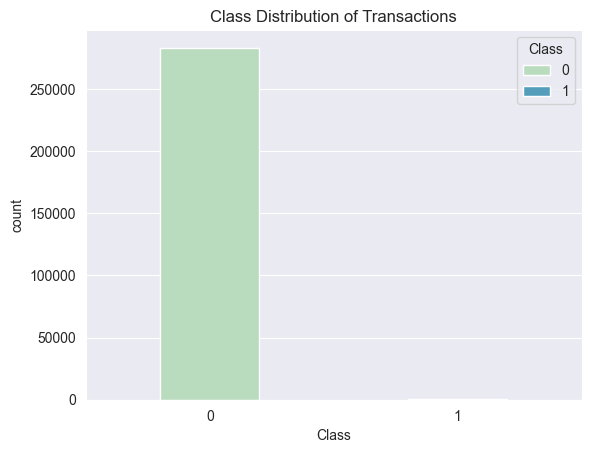

In [22]:
# visualize class distribution
sns.countplot( 
    x='Class', 
    data=cleaned_data, 
    palette='GnBu', 
    width=0.4,
    hue='Class',
)
plt.title('Class Distribution of Transactions')
plt.show()

To be noted that, we used 0 as non-fraudulent and 1 as fraudulent. We can see that there is an imbalance between fraudulent and non-fraudulent transactions. So, we tried to display plots to understand the distribution of each feature.

## Correlation Matrix

We can also plot correlation matrix to understand the correlation between features.

<Axes: >

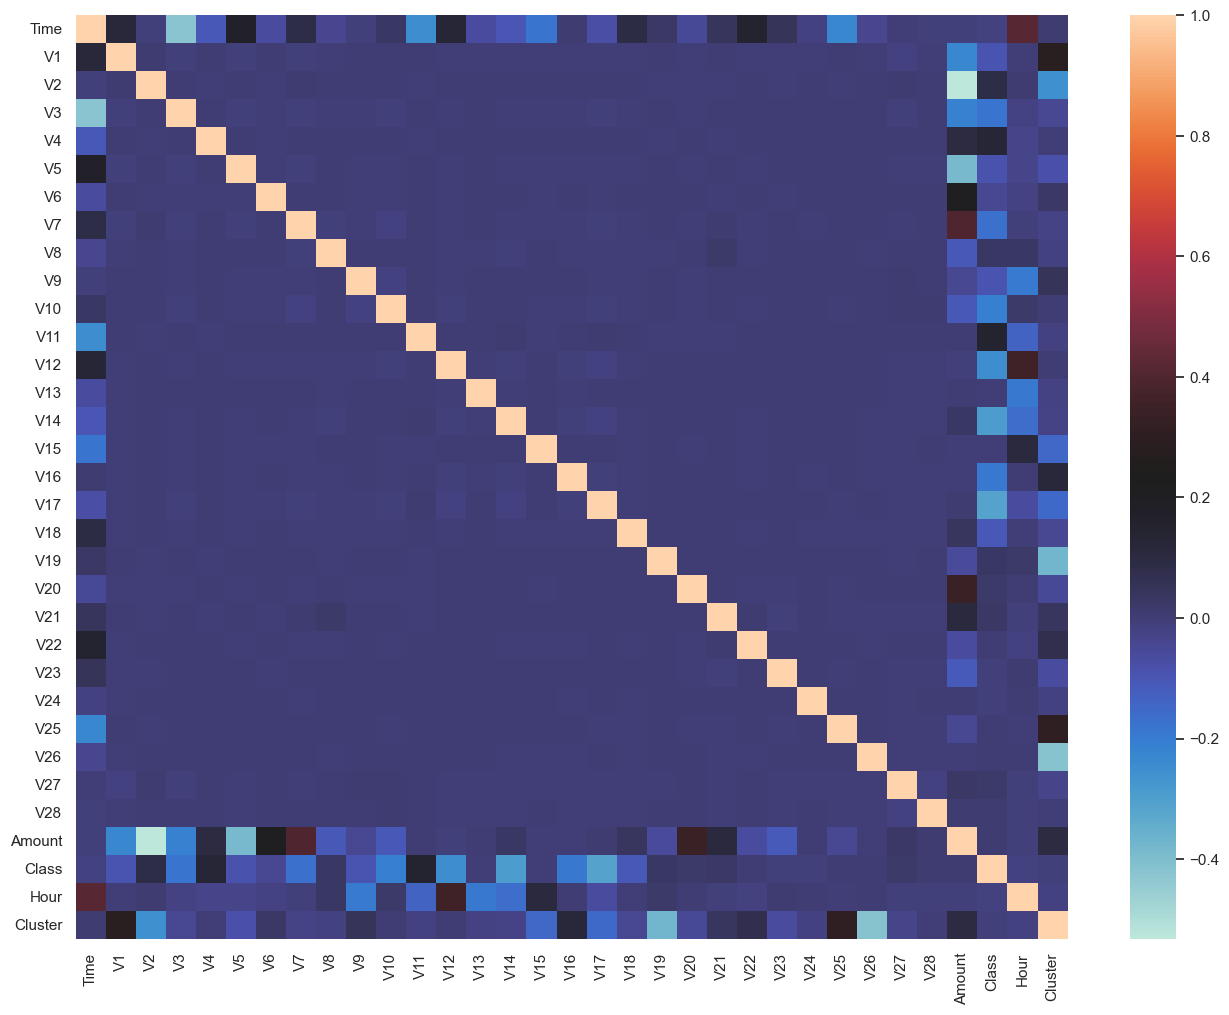

In [23]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='icefire')

Here in correlation matrix plot, we will focus only on class column. 
- In heatmap, 0 or neutral -> barely have any correlation -> changing them barely have any effect on the column/row.
- In heatmap, positive -> have positive correlation -> changing them will have similar effect on the column/row(if increased, effect will also be increase)(intensity will depend on how high the value is).
- In heatmap, negative -> have negative correlation -> changing them will have opposite effect on the column/row(if increased, effect will be in decrease)(intensity will depend on how high the value is).

Therefore, in the heatmap we can see that, 
    
    V7, V10. V12, V14, V16, V17 -> negative correlation.
    V11, V2, V4 -> positive correlation.
    others -> somewhat neutral or a bit positively correlated.

However, this is extremely imbalanced dataset, so later we will have to use SMOTE/under sampling to handle the imbalance for accuracy.

# Feature Engineering

In [ ]:
cleaned_data = clean_data(data)
scaled_data = scale_features(cleaned_data)
cleaned_data.describe()
scaled_data.describe()

# Model Building

# Model Evaluation 

# Conclusion

# Reference